___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [5]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [6]:
drop_list = ["RowNumber", "CustomerId", "Surname"]

In [7]:
df=df.drop(drop_list, axis=1)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [9]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,0,0,1
9996,516,35,10,57369.610,1,1,1,101699.770,0,0,0,1
9997,709,36,7,0.000,1,0,1,42085.580,1,0,0,0
9998,772,42,3,75075.310,2,1,0,92888.520,1,1,0,1


In [11]:
df = df.iloc[:, [0,1,2,3,4,5,6,7,9,10,11,8]]
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,619,42,2,0.000,1,1,1,101348.880,0,0,0,1
1,608,41,1,83807.860,1,0,1,112542.580,0,1,0,0
2,502,42,8,159660.800,3,1,0,113931.570,0,0,0,1
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,1,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  uint8  
 9   Geography_Spain    10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
 11  Exited             10000 non-null  int64  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


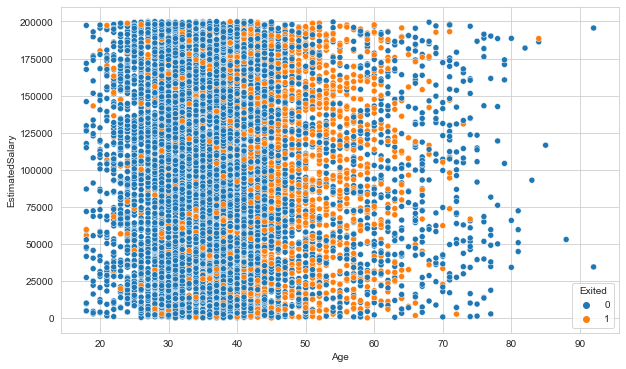

In [13]:
sns.scatterplot(x = 'Age',y = 'EstimatedSalary', data = df, hue = "Exited");

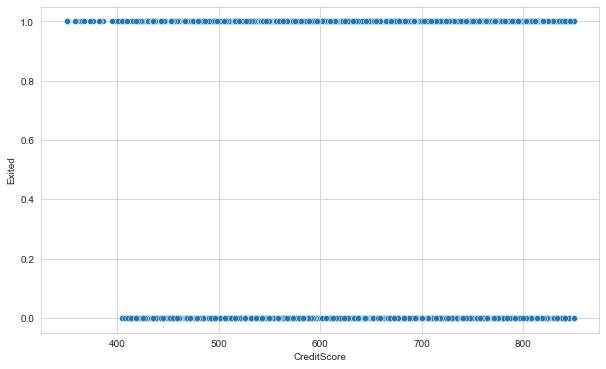

In [14]:
sns.scatterplot(x = 'CreditScore',y = 'Exited', data = df);

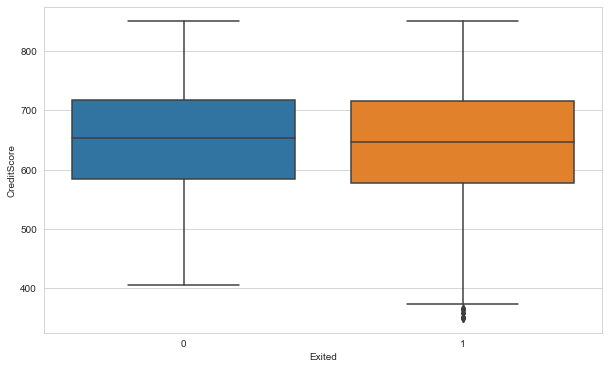

In [15]:
sns.boxplot(x = 'Exited', y = 'CreditScore', data = df);

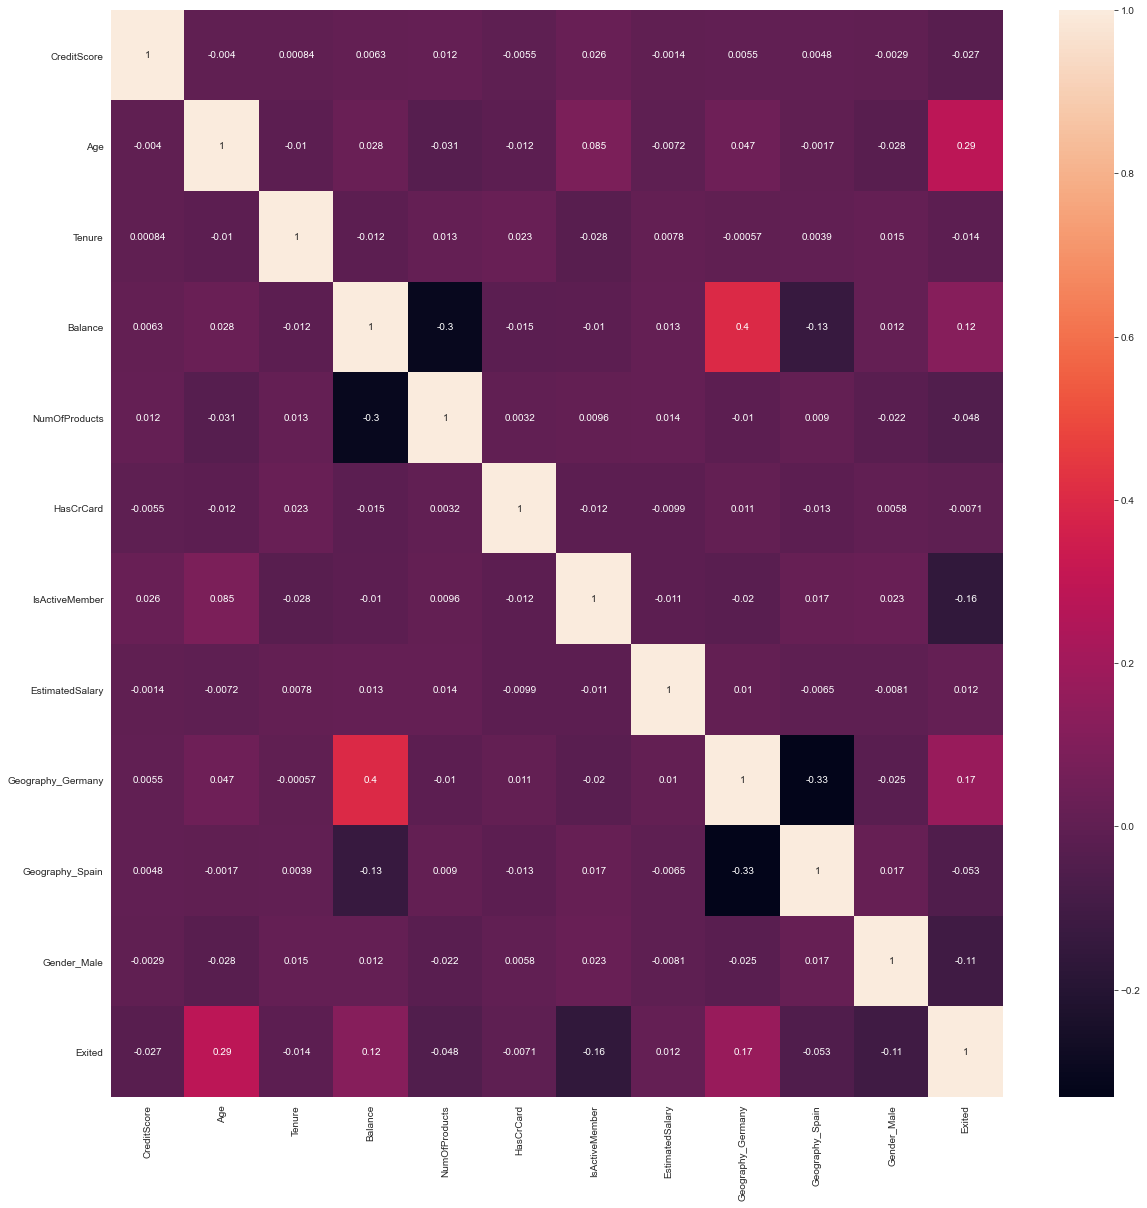

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

## Preprocessing of Data
- Train | Test Split, Scalling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [18]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.1, random_state = 42)

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

### Creating Model

In [23]:
X_train.shape

(9000, 11)

In [24]:
X_test.shape

(1000, 11)

In [25]:
seed = 42

In [26]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(14, activation = "relu", input_dim = X_train.shape[1])) 
model.add(Dense(6, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid")) #clasification yapmak için sigmoid 

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

### without class_weigth

In [27]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 200, verbose=1)

Epoch 1/200
64/64 [==============================] - 1s 5ms/step - loss: 0.6717 - accuracy: 0.6702 - val_loss: 0.6213 - val_accuracy: 0.7989
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5661 - accuracy: 0.7960 - val_loss: 0.5112 - val_accuracy: 0.7989
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4990 - accuracy: 0.7960 - val_loss: 0.4860 - val_accuracy: 0.7989
Epoch 4/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.7960 - val_loss: 0.4727 - val_accuracy: 0.7989
Epoch 5/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.7960 - val_loss: 0.4600 - val_accuracy: 0.7989
Epoch 6/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7960 - val_loss: 0.4500 - val_accuracy: 0.7989
Epoch 7/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.7960 - val_loss: 0.4419 - val_accuracy: 0.7989
Epoch 8/200
6

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                168       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [29]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.672,0.670,0.621,0.799
1,0.566,0.796,0.511,0.799
2,0.499,0.796,0.486,0.799
3,0.486,0.796,0.473,0.799
4,0.476,0.796,0.460,0.799


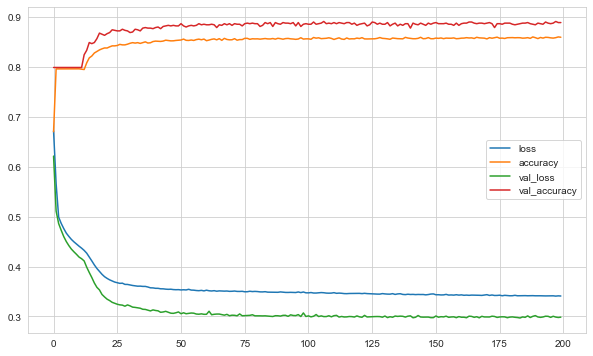

In [30]:
loss_df.plot();

#### Evaluate

In [31]:
model.evaluate(X_test, y_test, verbose=0)

[0.3443831503391266, 0.8629999756813049]

In [32]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3443831503391266
accuracy :  0.8629999756813049


In [33]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[770  26]
 [111  93]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.78      0.46      0.58       204

    accuracy                           0.86      1000
   macro avg       0.83      0.71      0.75      1000
weighted avg       0.86      0.86      0.85      1000



### EarlyStopping

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(14, activation = "relu", input_dim = X_train.shape[1])) 
model.add(Dense(6, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid")) #clasification yapmak için sigmoid 

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [36]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [37]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 200, verbose = 1,
          callbacks = [early_stop])

Epoch 1/200
64/64 [==============================] - 1s 7ms/step - loss: 0.6717 - accuracy: 0.6702 - val_loss: 0.6213 - val_accuracy: 0.7989
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5661 - accuracy: 0.7960 - val_loss: 0.5112 - val_accuracy: 0.7989
Epoch 3/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4990 - accuracy: 0.7960 - val_loss: 0.4860 - val_accuracy: 0.7989
Epoch 4/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4864 - accuracy: 0.7960 - val_loss: 0.4727 - val_accuracy: 0.7989
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4761 - accuracy: 0.7960 - val_loss: 0.4600 - val_accuracy: 0.7989
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4669 - accuracy: 0.7960 - val_loss: 0.4500 - val_accuracy: 0.7989
Epoch 7/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.7960 - val_loss: 0.4419 - val_accuracy: 0.7989
Epoch 8/200
6

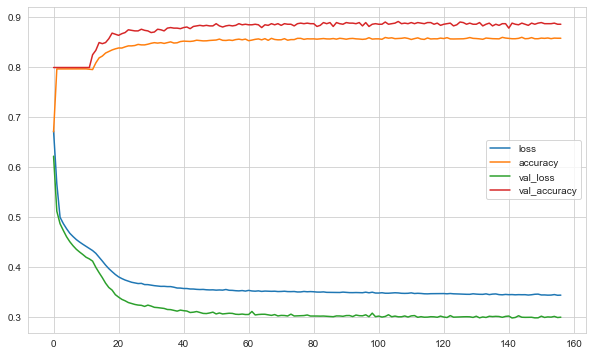

In [38]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [39]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3470046818256378
accuracy :  0.8579999804496765


In [40]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[772  24]
 [118  86]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.78      0.42      0.55       204

    accuracy                           0.86      1000
   macro avg       0.82      0.70      0.73      1000
weighted avg       0.85      0.86      0.84      1000



### learning_rate

In [41]:
from tensorflow.keras.optimizers import Adam

In [42]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(14, activation = "relu", input_dim = X_train.shape[1])) 
model.add(Dense(6, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid")) #clasification yapmak için sigmoid 

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [43]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 200, verbose = 1,)

Epoch 1/200
64/64 [==============================] - 1s 5ms/step - loss: 0.5580 - accuracy: 0.7668 - val_loss: 0.4779 - val_accuracy: 0.7989
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4708 - accuracy: 0.7960 - val_loss: 0.4441 - val_accuracy: 0.7989
Epoch 3/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.7960 - val_loss: 0.4239 - val_accuracy: 0.7989
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4364 - accuracy: 0.7960 - val_loss: 0.4080 - val_accuracy: 0.7989
Epoch 5/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4220 - accuracy: 0.7962 - val_loss: 0.3877 - val_accuracy: 0.7989
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3973 - accuracy: 0.8167 - val_loss: 0.3546 - val_accuracy: 0.8589
Epoch 7/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.8380 - val_loss: 0.3263 - val_accuracy: 0.8644
Epoch 8/200
6

<AxesSubplot:>

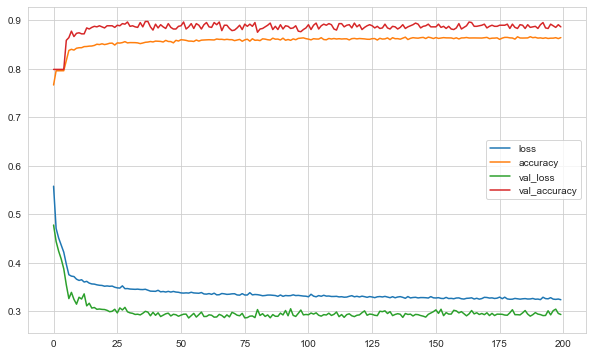

In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [45]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.346139520406723
accuracy :  0.8539999723434448


In [46]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[761  35]
 [111  93]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.73      0.46      0.56       204

    accuracy                           0.85      1000
   macro avg       0.80      0.71      0.74      1000
weighted avg       0.84      0.85      0.84      1000



### Dropout

In [47]:
from tensorflow.keras.layers import Dropout

In [48]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(14, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(6, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [49]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 200, verbose = 1)

Epoch 1/200
64/64 [==============================] - 1s 6ms/step - loss: 0.5752 - accuracy: 0.7611 - val_loss: 0.4860 - val_accuracy: 0.7989
Epoch 2/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.7960 - val_loss: 0.4441 - val_accuracy: 0.7989
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4650 - accuracy: 0.7960 - val_loss: 0.4194 - val_accuracy: 0.7989
Epoch 4/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.8006 - val_loss: 0.4008 - val_accuracy: 0.8178
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.8086 - val_loss: 0.3860 - val_accuracy: 0.8378
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.8146 - val_loss: 0.3766 - val_accuracy: 0.8378
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.8183 - val_loss: 0.3604 - val_accuracy: 0.8589
Epoch 8/200
6

<AxesSubplot:>

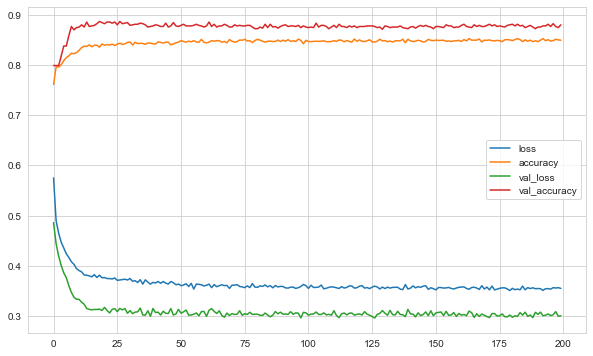

In [50]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [51]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3522337079048157
accuracy :  0.8479999899864197


In [52]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[756  40]
 [112  92]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.70      0.45      0.55       204

    accuracy                           0.85      1000
   macro avg       0.78      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



In [67]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

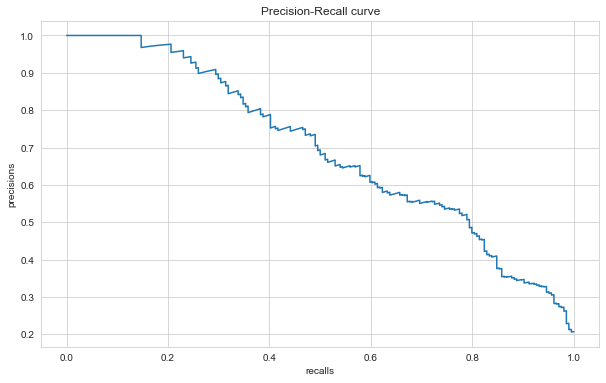

In [68]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [53]:
from sklearn.utils import class_weight
x = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

In [54]:
x = dict(enumerate(x))

In [55]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(14, activation = "relu", input_dim = X_train.shape[1])) 
model.add(Dense(6, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid")) #clasification yapmak için sigmoid 

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [56]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 200, verbose = 1, class_weight = x)

Epoch 1/200
71/71 [==============================] - 1s 6ms/step - loss: 0.6838 - accuracy: 0.4396 - val_loss: 0.6915 - val_accuracy: 0.5400
Epoch 2/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.5976 - val_loss: 0.6743 - val_accuracy: 0.6040
Epoch 3/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.6461 - val_loss: 0.6606 - val_accuracy: 0.6240
Epoch 4/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.6711 - val_loss: 0.6404 - val_accuracy: 0.6440
Epoch 5/200
71/71 [==============================] - 0s 3ms/step - loss: 0.5987 - accuracy: 0.6789 - val_loss: 0.5909 - val_accuracy: 0.6920
Epoch 6/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.6970 - val_loss: 0.6199 - val_accuracy: 0.6490
Epoch 7/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.7042 - val_loss: 0.5588 - val_accuracy: 0.7180
Epoch 8/200
7

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 14)                168       
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 90        
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 5         
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [58]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.684,0.440,0.691,0.540
1,0.663,0.598,0.674,0.604
2,0.637,0.646,0.661,0.624
3,0.616,0.671,0.640,0.644
4,0.599,0.679,0.591,0.692


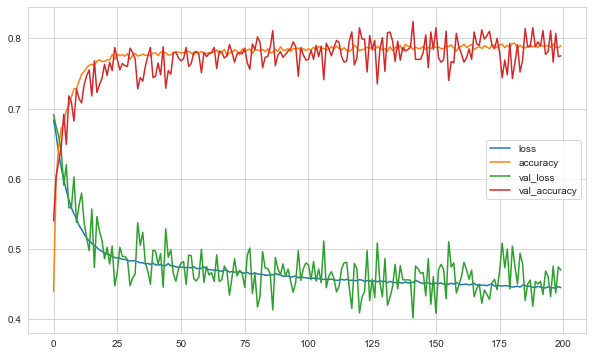

In [59]:
loss_df.plot();

#### Evaluate

In [60]:
model.evaluate(X_test, y_test, verbose=0)

[0.46979084610939026, 0.7749999761581421]

In [61]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.46979084610939026
accuracy :  0.7749999761581421


In [62]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test) #tensorflow 2.5'e kadar bu fonksiyon var ondan üstteki kodu manuel yapıyoruz. önce true false yaptık sonra intt ile 0 ve 1 e düşürdük.
#normalde predict x_test için otomatik 0 ve 1 e yuvarlardı değerleri ama artık yok.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[610 186]
 [ 39 165]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.84       796
           1       0.47      0.81      0.59       204

    accuracy                           0.78      1000
   macro avg       0.70      0.79      0.72      1000
weighted avg       0.84      0.78      0.79      1000



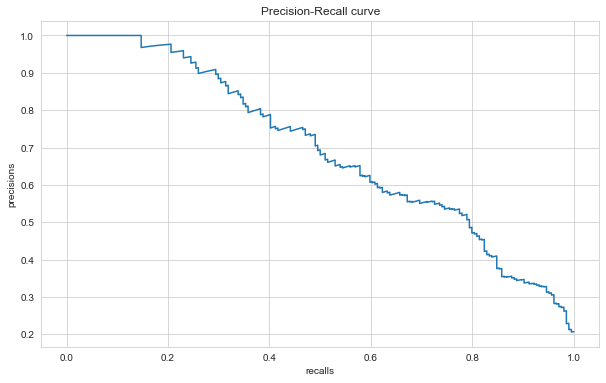

In [69]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

## GridSearchCV

In [63]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adadelta, RMSprop, Nadam, Adam, SGD

In [64]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 4, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [65]:
tf.random.set_seed(seed)

classifier = KerasClassifier(build_fn=build_classifier, epochs=200)
parameters = {
    'batch_size': [128, 256],
    'optimizer': [Adam, RMSprop, Nadam, Adadelta, SGD],
    'learn_rate': [0.001, 0.003, 0.005]
}
grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=5,
                          n_jobs=-1,
                          verbose=0).fit(X_train,
                                         y_train,
                                         class_weight=x)

KeyboardInterrupt: 

#### Evaluate

## Final Model and Model Deployment

In [70]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [74]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.003)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), callbacks=[early_stop], batch_size=256, epochs=200, verbose=1, class_weight=x)    


Epoch 1/200
36/36 [==============================] - 1s 12ms/step - loss: 0.6792 - recall: 0.5559 - val_loss: 0.6555 - val_recall: 0.5784
Epoch 2/200
36/36 [==============================] - 0s 5ms/step - loss: 0.6328 - recall: 0.6574 - val_loss: 0.6446 - val_recall: 0.6765
Epoch 3/200
36/36 [==============================] - 0s 7ms/step - loss: 0.5993 - recall: 0.6809 - val_loss: 0.6331 - val_recall: 0.7206
Epoch 4/200
36/36 [==============================] - 0s 4ms/step - loss: 0.5857 - recall: 0.6896 - val_loss: 0.6065 - val_recall: 0.6912
Epoch 5/200
36/36 [==============================] - 0s 3ms/step - loss: 0.5765 - recall: 0.7005 - val_loss: 0.5538 - val_recall: 0.6225
Epoch 6/200
36/36 [==============================] - 0s 4ms/step - loss: 0.5727 - recall: 0.6890 - val_loss: 0.6645 - val_recall: 0.7941
Epoch 7/200
36/36 [==============================] - 0s 4ms/step - loss: 0.5697 - recall: 0.7016 - val_loss: 0.5629 - val_recall: 0.6618
Epoch 8/200
36/36 [=====================

<AxesSubplot:>

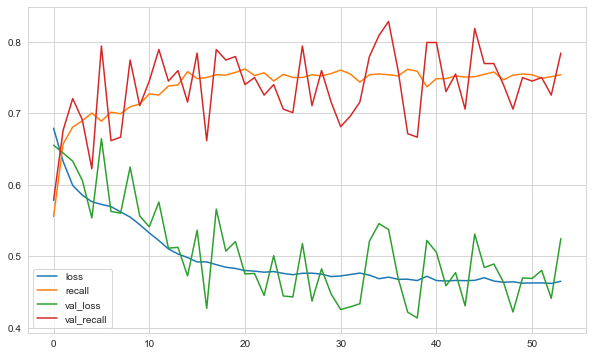

In [75]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [76]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.5249143838882446
recall :  0.7843137383460999


In [77]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[573 223]
 [ 44 160]]
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       796
           1       0.42      0.78      0.55       204

    accuracy                           0.73      1000
   macro avg       0.67      0.75      0.68      1000
weighted avg       0.82      0.73      0.76      1000



In [78]:
model.save('model_churn.h5')

### Prediction

In [79]:
sample = df.drop('Exited', axis=1).iloc[0]
sample

CreditScore            619.000
Age                     42.000
Tenure                   2.000
Balance                  0.000
NumOfProducts            1.000
HasCrCard                1.000
IsActiveMember           1.000
EstimatedSalary     101348.880
Geography_Germany        0.000
Geography_Spain          0.000
Gender_Male              0.000
Name: 0, dtype: float64

In [80]:
sample = scaler.transform(sample.values.reshape(-1, 11))
sample

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

In [81]:
y_pred =(model.predict(sample) > 0.5).astype("int32")
y_pred

array([[1]])

In [82]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___